Link to data source: https://www.kaggle.com/datasets/bobnau/daily-website-visitors

# Daily website visitors

* Number of website **visitors** for **5 years** of **daily**
* An academic teaching notes website whose alias is ***statforecasting.com***
* **Predict** future's number of website visitors

### Load the data

In [98]:
import pandas as pd

data_path = 'daily-website-visitors.csv'
data = pd.read_csv(data_path)
data

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


##### Content
* **2167** rows of data
* From September 14, 2014, to August 19, 2020

##### Variables
* **Page.Loads**: daily counts of page loads
* **Unique.Visits**: daily counts of unique visitors - the sum of the counts of returning and first-time visitors
* **First.Time.Visits**: daily counts of first-time visitors
* **Returning.Visits**: daily counts of returning visitors

### Data preprocessing

In [99]:
# Convert Date into Datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Remove commas
data.replace(',', '', regex=True, inplace=True)

# Convert into int type
data['Page.Loads'] = data['Page.Loads'].astype(int)
data['Unique.Visits'] = data['Unique.Visits'].astype(int)
data['First.Time.Visits'] = data['First.Time.Visits'].astype(int)
data['Returning.Visits'] = data['Returning.Visits'].astype(int)

data.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,2014-09-14,2146,1582,1430,152
1,2,Monday,2,2014-09-15,3621,2528,2297,231
2,3,Tuesday,3,2014-09-16,3698,2630,2352,278
3,4,Wednesday,4,2014-09-17,3667,2614,2327,287
4,5,Thursday,5,2014-09-18,3316,2366,2130,236


### Bootstrapping function
Frequency distribution of **unique visitors** column
* Parameters:
  * n: bootstrap sample size
  * M: number of bootstrap samplings
  * x: confidence interval in %
* Returns:
  * sampling distribution
  * confidence interval

Confidence interval in 95%
Unique visits mean: 2944.7839800000006
Confidence interval: [2787.52, 3092.62]


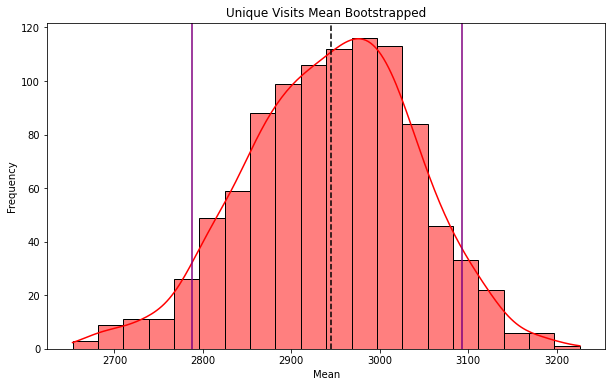

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def bootstrapping(n, M, x):
    mean_bootstrap = []

    # Make a bootstraped dataset of size M
    for _ in range(M):
        # Randomly select n rows from the original dataset
        samples_random = data.sample(n)
        # Calculate the mean of the bootstrapped dataset
        mean_samples = samples_random['Unique.Visits'].mean()
        # Append the mean to the list
        mean_bootstrap.append(mean_samples)

    # Calculate the mean of the bootstrapped dataset
    mean = sum(mean_bootstrap) / len(mean_bootstrap)

    # Compute the confidence interval of the mean
    alpha = 1-x
    mean_bootstrap.sort()
    lower_bound = mean_bootstrap[int(alpha * M)]
    upper_bound = mean_bootstrap[int((1 - alpha) * M)]
    print(f'Confidence interval in {int(100*x)}%')
    print(f'Unique visits mean: {mean}')
    print(f'Confidence interval: [{lower_bound}, {upper_bound}]')

    # Plot the bootstrapped mean
    plt.figure(figsize=(10, 6))
    fig = sns.histplot(mean_bootstrap, kde=True, bins=20, color='red')
    plt.axvline(lower_bound, color='purple')
    plt.axvline(upper_bound, color='purple')
    plt.axvline(mean, color='black', linestyle='dashed')
    plt.title('Unique Visits Mean Bootstrapped')
    fig.set_xlabel('Mean')
    fig.set_ylabel('Frequency')
    plt.show()

bootstrapping(100, 1000, 0.95)

### Visualizing the page loads and visits over time series

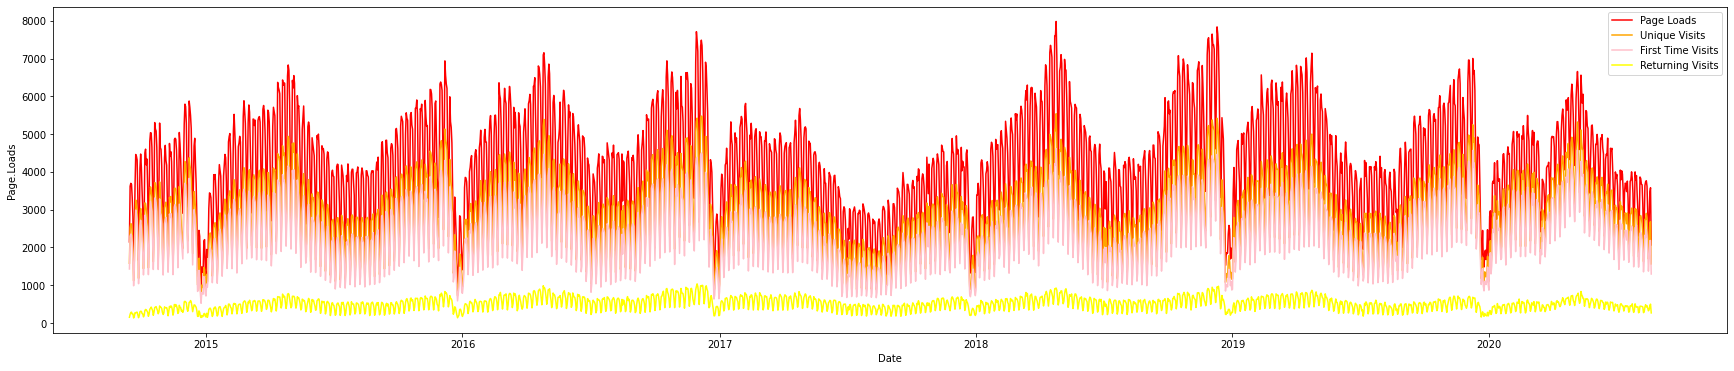

In [101]:
# Plot Page Loads & Visits over time series
plt.figure(figsize=(30, 6))
fig = sns.lineplot(x='Date', y='Page.Loads', data=data, color='red', label='Page Loads')
fig = sns.lineplot(x='Date', y='Unique.Visits', data=data, color='orange', label='Unique Visits')
fig = sns.lineplot(x='Date', y='First.Time.Visits', data=data, color='pink', label='First Time Visits')
fig = sns.lineplot(x='Date', y='Returning.Visits', data=data, color='yellow', label='Returning Visits')
plt.show()

> Page loads and Visits have a **constant fluctuation**
> 
> They have been **correlated** to each other

### Average Value Counts per day

In [102]:
# Group the data by day
data_group_by_day = data.groupby('Day')
data_group_by_day.describe()

Row                                                            \
           count    mean         std  min     25%     50%      75%     max   
Day                                                                          
Friday     309.0  1084.0  625.413863  6.0  545.00  1084.0  1623.00  2162.0   
Monday     310.0  1083.5  627.434592  2.0  542.75  1083.5  1624.25  2165.0   
Saturday   309.0  1085.0  625.413863  7.0  546.00  1085.0  1624.00  2163.0   
Sunday     310.0  1082.5  627.434592  1.0  541.75  1082.5  1623.25  2164.0   
Thursday   309.0  1083.0  625.413863  5.0  544.00  1083.0  1622.00  2161.0   
Tuesday    310.0  1084.5  627.434592  3.0  543.75  1084.5  1625.25  2166.0   
Wednesday  310.0  1085.5  627.434592  4.0  544.75  1085.5  1626.25  2167.0   

          Day.Of.Week       ... First.Time.Visits         Returning.Visits  \
                count mean  ...               75%     max            count   
Day                         ...                                              
Friday          309.0  6.0  ...           2512.00  3592.0            309.0   
Monday          310.0  2.0  ...           3432.75  4569.0            310.0   
Saturday        309.0  7.0  ...           1760.00  2932.0            309.0   
Sunday          310.0  1.0  ...           2416.75  3393.0            310.0   
Thursday        309.0  5.0  ...           3265.00  4213.0            309.0   
Tuesday         310.0  3.0  ...           3490.00  4500.0            310.0   
Wednesday       310.0  4.0  ...           3401.75  4616.0            310.0   

                                                                         
                 mean         std    min     25%    50%     75%     max  
Day                                                                      
Friday     482.352751  106.514290  138.0  414.00  483.0  551.00   806.0  
Monday     600.245161  147.837873  206.0  502.25  592.5  697.75   987.0  
Saturday   309.566343   83.502661  133.0  244.00  308.0  368.00   541.0  
Sunday     392.245161  113.078049  152.0  305.25  382.0  472.75   784.0  
Thursday   580.236246  134.153573  145.0  498.00  577.0  675.00   993.0  
Tuesday    611.061290  142.203440  187.0  521.00  605.5  706.50   985.0  
Wednesday  606.522581  144.897680  175.0  501.00  600.5  703.75  1036.0  

[7 rows x 48 columns]

In [103]:
data_average_day = data_group_by_day.mean().reset_index().drop(['Row', 'Day.Of.Week'], axis=1)
data_average_day

,Day,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Friday,3719.860841,2646.770227,2164.417476,482.352751
1,Monday,4845.680645,3458.425806,2858.180645,600.245161
2,Saturday,2501.025890,1786.747573,1477.181230,309.566343
3,Sunday,3246.980645,2341.270968,1949.025806,392.245161
4,Thursday,4651.355987,3327.553398,2747.317152,580.236246
5,Tuesday,4955.335484,3539.293548,2928.232258,611.061290
6,Wednesday,4893.916129,3502.012903,2895.490323,606.522581


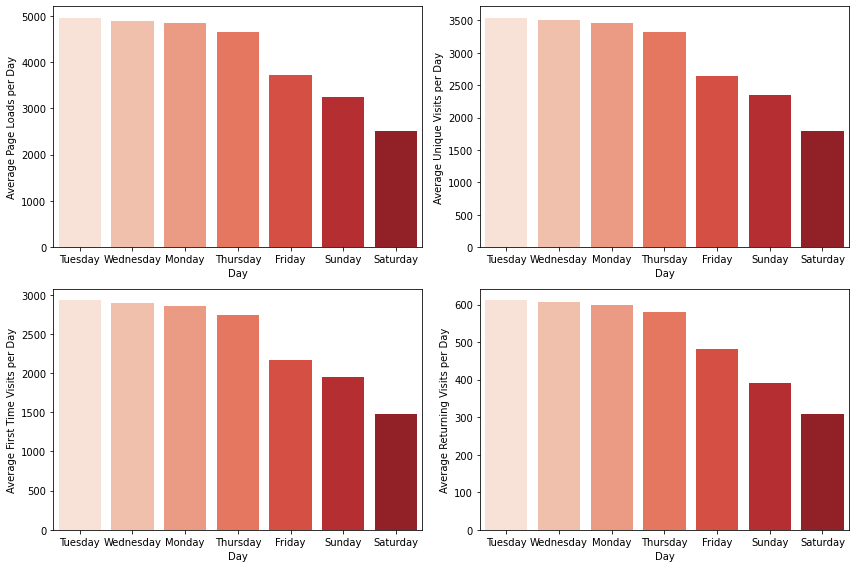

In [104]:
# Plot the Bargraph for every average per day
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.barplot(x='Day', y='Page.Loads', data=data_average_day.sort_values(by='Page.Loads', ascending=False), palette='Reds')
ax1.set_xlabel('Day')
ax1.set_ylabel('Average Page Loads per Day')

ax2 = plt.subplot(2, 2, 2)
ax2 = sns.barplot(x='Day', y='Unique.Visits', data=data_average_day.sort_values(by='Unique.Visits', ascending=False), palette='Reds')
ax2.set_xlabel('Day')
ax2.set_ylabel('Average Unique Visits per Day')

ax3 = plt.subplot(2, 2, 3)
ax3 = sns.barplot(x='Day', y='First.Time.Visits', data=data_average_day.sort_values(by='First.Time.Visits', ascending=False), palette='Reds')
ax3.set_xlabel('Day')
ax3.set_ylabel('Average First Time Visits per Day')

ax4 = plt.subplot(2, 2, 4)
ax4 = sns.barplot(x='Day', y='Returning.Visits', data=data_average_day.sort_values(by='Returning.Visits', ascending=False), palette='Reds')
ax4.set_xlabel('Day')
ax4.set_ylabel('Average Returning Visits per Day')

plt.tight_layout()
plt.show()

> The day have the most visits is **Tuesday**. Next is Wednesday, Monday, Thursday, Friday.
> 
> The least visits are **Sunday** and **Saturday**.
> 
> Weekdays are more visited than weekends.

> The features in this dataset have the similar trend. 
> 
> => Analyzing the **Unique.Visits** using **time series data** analysis to explore more deeper about the **evolution** of data over time and use it to make **predictions** about future data